In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency

C:\Users\damaj\AppData\Local\Temp\ipykernel_16036\2273523840.py:10: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  GH1 = pd.read_csv(file1, encoding='latin1')


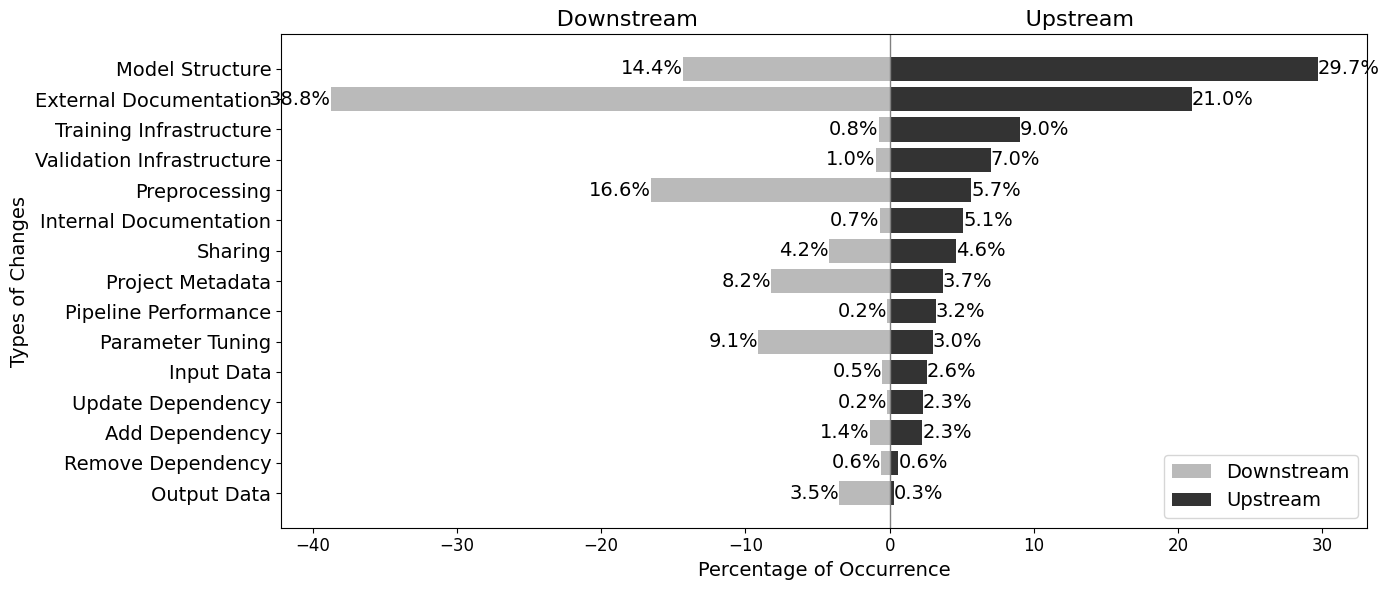

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load CSV files
file1 = "GH_labelled_combined_csv_file.csv"
file2 = "HF_all_labels_from_gemini.csv"
f2 = "must_exclude_from_all_analysis.csv"

GH1 = pd.read_csv(file1, encoding='latin1')
HF1 = pd.read_csv(file2, encoding='latin1')
dfs2 = pd.read_csv(f2, encoding='latin1')

# Exclusions
exclusion = list(dfs2['family'].unique())
excluded_labels = ['bug fix', 'unclear', 'uncategorized', 'add model']

GH2 = GH1[~GH1['label'].isin(exclusion)]
HF2 = HF1[~HF1['label'].isin(exclusion)]

GH = GH2[~GH2['label'].isin(excluded_labels)]
HF = HF2[~HF2['label'].isin(excluded_labels)]

# Group and count
GH_group = GH.groupby('label').size().reset_index(name='GH_count')
HF_group = HF.groupby('label').size().reset_index(name='HF_count')

# Percentages
GH_total = GH_group['GH_count'].sum()
HF_total = HF_group['HF_count'].sum()
GH_group['GH_percentage'] = GH_group['GH_count'] / GH_total * 100
HF_group['HF_percentage'] = HF_group['HF_count'] / HF_total * 100

# Merge and clean
merged_df = pd.merge(GH_group, HF_group, on='label', how='outer').fillna(0)
merged_df['label'] = merged_df['label'].str.title()

# Sort by GH_percentage (Upstream)
merged_df = merged_df.sort_values(by='GH_percentage', ascending=True).reset_index(drop=True)

# Prepare index for plotting
y = np.arange(len(merged_df))

# Plotting symmetric horizontal bars
plt.figure(figsize=(14, 6))
plt.barh(y, -merged_df['HF_percentage'], color='darkgrey', alpha=0.8, label='Downstream')
plt.barh(y, merged_df['GH_percentage'], color='black', alpha=0.8, label='Upstream')

# Add percentage labels
for i, (hf, gh) in enumerate(zip(merged_df['HF_percentage'], merged_df['GH_percentage'])):
    plt.text(-hf - 0, i, f'{hf:.1f}%', va='center', ha='right', fontsize=14)
    plt.text(gh + 0, i, f'{gh:.1f}%', va='center', ha='left', fontsize=14)

# Aesthetics
plt.axvline(x=0, color='gray', linewidth=1)
plt.yticks(y, merged_df['label'], fontsize=14)
plt.xticks(fontsize=12)
plt.xlabel('Percentage of Occurrence', fontsize=14)
plt.ylabel('Types of Changes', fontsize=14)
plt.title('      Downstream                                              Upstream', fontsize=16)
plt.legend(loc='lower right', fontsize=14)

plt.tight_layout()
plt.savefig("RQ01_symmetric_sorted_GH.pdf", bbox_inches='tight')
plt.show()


C:\Users\damaj\AppData\Local\Temp\ipykernel_16036\761783947.py:10: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  GH1 = pd.read_csv(file1, encoding='latin1')


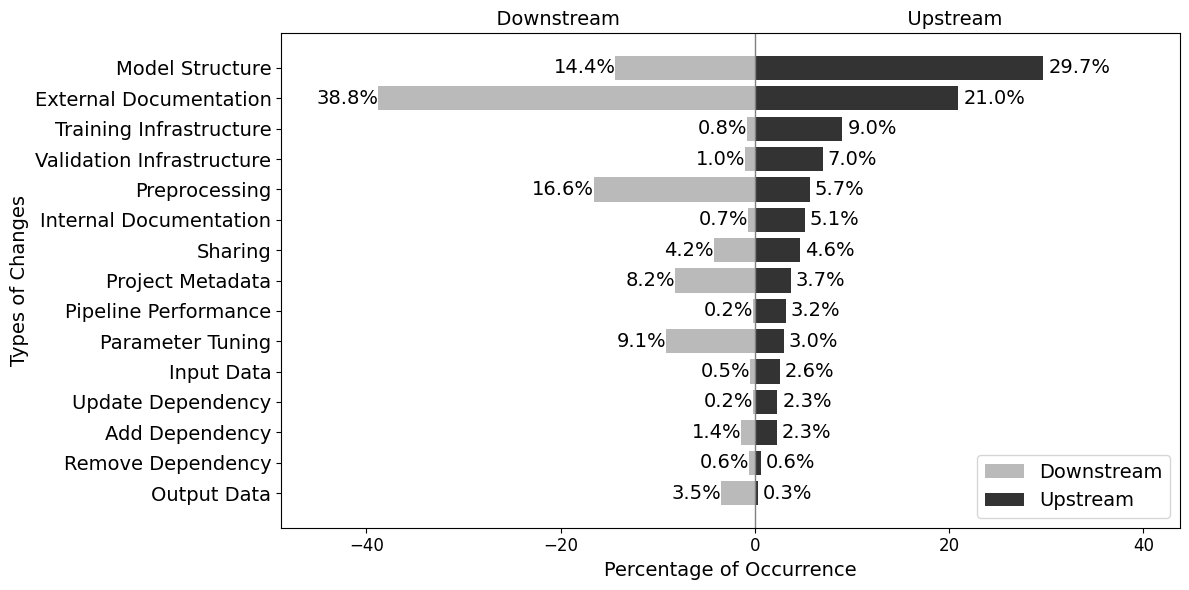

                        label  GH_count  GH_percentage
0              add dependency      3432       2.274188
1      external documentation     31626      20.956723
2                  input data      3906       2.588281
3      internal documentation      7717       5.113610
4             model structure     44812      29.694323
5                 output data       466       0.308791
6            parameter tuning      4525       2.998456
7        pipeline performance      4800       3.180683
8               preprocessing      8533       5.654326
9            project metadata      5541       3.671701
10          remove dependency       906       0.600354
11                    sharing      6978       4.623917
12    training infrastructure     13606       9.015910
13          update dependency      3495       2.315935
14  validation infrastructure     10568       7.002803
                        label  HF_count  HF_percentage
0              add dependency       236       1.375612
1      ext

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load CSV files
file1 = "GH_labelled_combined_csv_file.csv"
file2 = "HF_all_labels_from_gemini.csv"
f2 = "must_exclude_from_all_analysis.csv"

GH1 = pd.read_csv(file1, encoding='latin1')
HF1 = pd.read_csv(file2, encoding='latin1')
dfs2 = pd.read_csv(f2, encoding='latin1')

# Define exclusions
exclusion = list(dfs2['family'].unique())
excluded_labels = ['bug fix', 'unclear', 'uncategorized', 'add model']

# Apply exclusions
GH2 = GH1[~GH1['label'].isin(exclusion)]
HF2 = HF1[~HF1['label'].isin(exclusion)]

GH = GH2[~GH2['label'].isin(excluded_labels)]
HF = HF2[~HF2['label'].isin(excluded_labels)]

# Group and count
GH_group = GH.groupby('label').size().reset_index(name='GH_count')
HF_group = HF.groupby('label').size().reset_index(name='HF_count')

# Calculate percentages
GH_total = GH_group['GH_count'].sum()
HF_total = HF_group['HF_count'].sum()

GH_group['GH_percentage'] = GH_group['GH_count'] / GH_total * 100
HF_group['HF_percentage'] = HF_group['HF_count'] / HF_total * 100

# Merge both grouped dataframes
merged_df = pd.merge(GH_group, HF_group, on='label', how='outer').fillna(0)
merged_df['label'] = merged_df['label'].str.title()

# Sort by GH_percentage (Upstream)
merged_df = merged_df.sort_values(by='GH_percentage', ascending=True).reset_index(drop=True)

# Prepare y-axis positions
y = np.arange(len(merged_df))

# Calculate symmetric x-axis limits
max_range = max(merged_df['GH_percentage'].max(), merged_df['HF_percentage'].max())

# Start plotting
plt.figure(figsize=(12, 6))
plt.barh(y, -merged_df['HF_percentage'], color='darkgrey', alpha=0.8, label='Downstream')
plt.barh(y, merged_df['GH_percentage'], color='black', alpha=0.8, label='Upstream')

# Add percentage text labels
for i, (hf, gh) in enumerate(zip(merged_df['HF_percentage'], merged_df['GH_percentage'])):
    plt.text(-hf - 0, i, f'{hf:.1f}%', va='center', ha='right', fontsize=14)
    plt.text(gh + 0.5, i, f'{gh:.1f}%', va='center', ha='left', fontsize=14)

#plt.xlim(-max_range - 5, max_range + 5) 
# Aesthetics
plt.axvline(x=0, color='gray', linewidth=1)
plt.yticks(y, merged_df['label'], fontsize=14)
plt.xticks(fontsize=12)
plt.xlabel('Percentage of Occurrence', fontsize=14)
plt.ylabel('Types of Changes', fontsize=14)
plt.title('      Downstream                                              Upstream', fontsize=14)
plt.legend(loc='lower right', fontsize=14)
plt.xlim(-max_range - 10, max_range + 5)

plt.tight_layout()
plt.savefig("RQ01.pdf", bbox_inches='tight')
plt.show()

print(GH_group)
print(HF_group)

C:\Users\damaj\AppData\Local\Temp\ipykernel_16036\2241403979.py:11: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  GH1 = pd.read_csv(file1, encoding='latin1')
C:\Users\damaj\AppData\Local\Temp\ipykernel_16036\2241403979.py:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f"{int(tick / total * 100)}%" for tick in ax.get_yticks()], fontsize=14, color='black')


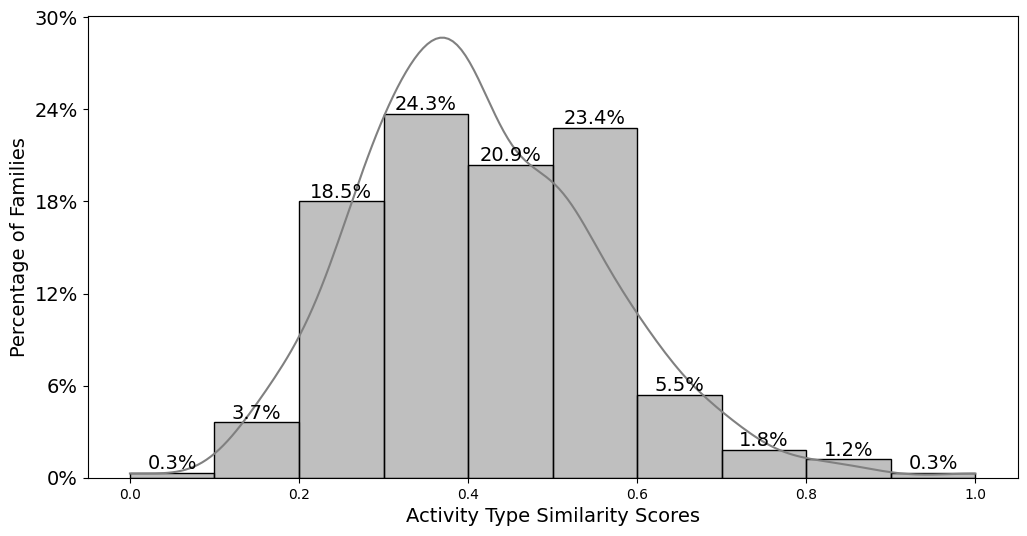

                     Family  Similarity Score
0       yangheng_absa-model          0.166667
1            CAMeL-Lab_bert          0.333333
2              google_gemma          0.533333
3      meta-llama_CodeLlama          0.333333
4       smallcloudai_Refact          0.400000
..                      ...               ...
320         facebook_hubert          0.571429
321   ckiplab_chinese-model          0.454545
322        Intel_distilbert          0.400000
323   vectara_hallucination          0.444444
324  lmstudio-community_aya          0.250000

[325 rows x 2 columns]

Top 5 Most Similar Families:
facebook_dragon             1.000000
bigscience_workshop         0.866667
stabilityai_StableBeluga    0.833333
distilbert_distilbert       0.800000
MoritzLaurer_DeBERTa        0.800000
dtype: float64

Bottom 5 Least Similar Families:
Nexusflow_NexusRaven     0.000000
microsoft_infoxlm        0.133333
apple_OpenELM            0.142857
cais_HarmBench           0.142857
PrunaAI_MaziyarPanahi   

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV files
file1 = "GH_labelled_combined_csv_file.csv"
file2 = "HF_all_labels_from_gemini.csv"
f2 = "must_exclude_from_all_analysis.csv"

GH1 = pd.read_csv(file1, encoding='latin1')
HF1 = pd.read_csv(file2, encoding='latin1')
dfs2 = pd.read_csv(f2, encoding='latin1')

exclusion = list(dfs2['family'].unique())
excluded_labels = ['bug fix', 'unclear', 'uncategorized', 'add model']

GH2 = GH1[~GH1['family'].isin(exclusion)]
HF2 = HF1[~HF1['family'].isin(exclusion)]

GH = GH2[~GH2['label'].isin(excluded_labels)]
HF = HF2[~HF2['label'].isin(excluded_labels)]

HF_grouped = HF.groupby('family')['label'].value_counts(normalize=True).unstack(fill_value=0)
GH_grouped = GH.groupby('family')['label'].value_counts(normalize=True).unstack(fill_value=0)

# Calculate Jaccard similarity
def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union if union != 0 else 0

similarity_scores = {}
for family in set(HF_grouped.index).intersection(set(GH_grouped.index)):
    hf_activities = set(HF_grouped.loc[family].index[HF_grouped.loc[family] > 0])
    gh_activities = set(GH_grouped.loc[family].index[GH_grouped.loc[family] > 0])
    similarity_scores[family] = jaccard_similarity(hf_activities, gh_activities)

# Convert similarity scores to a Pandas Series
similarity_series = pd.Series(similarity_scores)

# Plot histogram with percentages
plt.figure(figsize=(12, 6))
ax = sns.histplot(similarity_series, kde=True, bins=10, color='gray')  # Set bars to gray

# Convert y-axis counts to percentage
total = len(similarity_series)
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Avoid annotating empty bins
        percentage = f"{(height / total) * 100:.1f}%"
        ax.text(p.get_x() + p.get_width() / 2, height, percentage,
                ha='center', va='bottom', fontsize=14, color='black')  # Text color set to black

# Adjust y-axis labels to percentages
ax.set_yticklabels([f"{int(tick / total * 100)}%" for tick in ax.get_yticks()], fontsize=14, color='black')

# Titles and labels with black text color
plt.xlabel('Activity Type Similarity Scores', fontsize=14, color='black')
plt.ylabel('Percentage of Families', fontsize=14, color='black')

# Keep the background white (default)
plt.gcf().set_facecolor('white')
ax.set_facecolor('white')

# Optionally, add a light gray grid for better visibility
#ax.grid(True, linestyle='--', linewidth=0.5, color='gray')

# Save the plot
plt.savefig('similarity_distribution.pdf', dpi=300, bbox_inches='tight')
plt.savefig("RQ02.pdf", bbox_inches='tight')
plt.show()
#plt.show()

# Summary statistics
summary_stats = similarity_series.describe()
#print("Summary Statistics of Similarity Scores:")
#print(similarity_series)
similarity_df = similarity_series.to_frame(name='Similarity Score')

# Reset the index to make 'Family' a column
similarity_df = similarity_df.reset_index()

# Rename the 'index' column to 'Family'
similarity_df = similarity_df.rename(columns={'index': 'Family'})
print(similarity_df)

# Save results to CSV
#similarity_df.to_csv('I:/Paper2/PAPER2_experiment_steps/NLP/Experiment_for_top_models/RQ0_result/family_similarity_scores.csv', index=False)

# Find families with highest and lowest similarity
top_5_similar = similarity_series.nlargest(5)
bottom_5_similar = similarity_series.nsmallest(5)

print("\nTop 5 Most Similar Families:")
print(top_5_similar)

print("\nBottom 5 Least Similar Families:")
print(bottom_5_similar)

# Save results to CSV
results_df = pd.DataFrame.from_dict(similarity_scores, orient='index', columns=['Similarity Score'])
similarity_df.to_csv('family_similarity_scores.csv', index=False)

print("\nResults saved to 'family_similarity_scores.csv'")


C:\Users\damaj\AppData\Local\Temp\ipykernel_16036\1332152873.py:8: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(file1, encoding='latin1')


<Figure size 1600x1000 with 0 Axes>

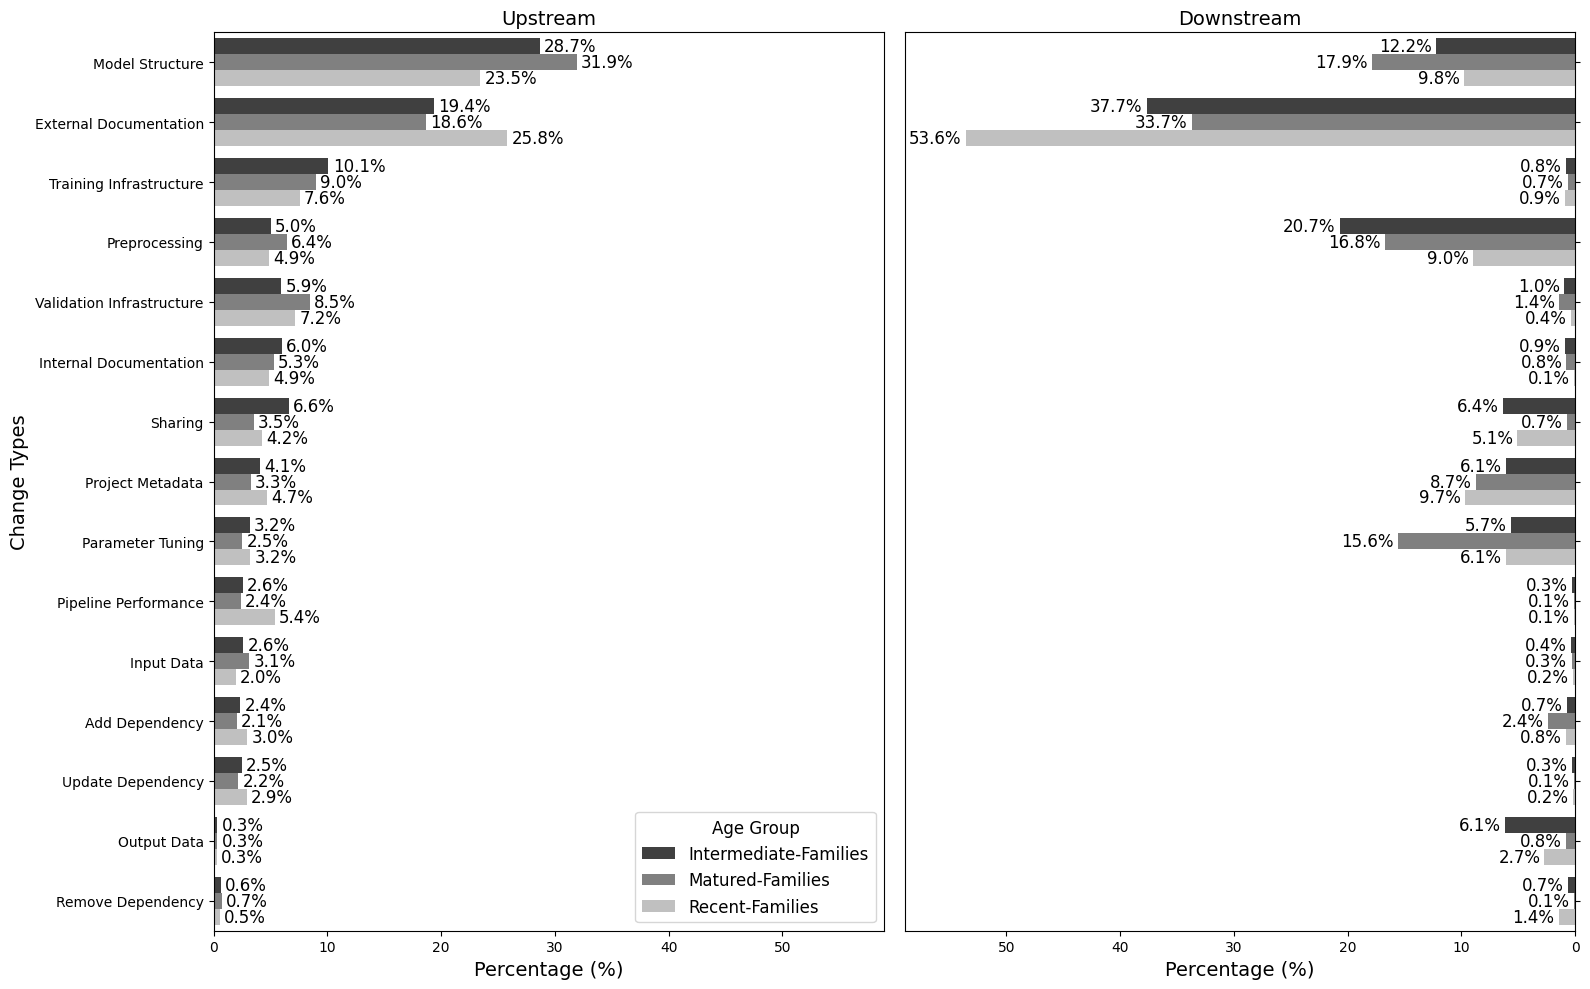

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file1 = "GH_data_devil.csv"
file2 = "HF_data_devil.csv"

df1 = pd.read_csv(file1, encoding='latin1')
df2 = pd.read_csv(file2, encoding='latin1')

def capitalize_words(text):
    return ' '.join(word.capitalize() for word in text.split())

def prepare_data(df, source):
    df['label'] = df['label'].apply(capitalize_words)
    activity_counts = df.groupby(['age_group', 'label']).size().reset_index(name='count')
    activity_counts['percentage'] = activity_counts.groupby('age_group')['count'].transform(lambda x: x / x.sum() * 100)
    activity_counts['source'] = source  # Add source column
    return activity_counts

# Prepare both datasets
df1_prep = prepare_data(df1, 'Upstream')
df2_prep = prepare_data(df2, 'Downstream')

# Combine the datasets
combined_df = pd.concat([df1_prep, df2_prep])

# Get the label order based on total counts (you can adjust this if needed)
label_order = combined_df.groupby('label')['count'].sum().sort_values(ascending=False).index

# Create figure
plt.figure(figsize=(16, 10))

# Create two subplots that share the y-axis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 10), sharey=True)

# Plot upstream data on the left (ax1)
sns.barplot(
    data=df1_prep,
    y='label',
    x='percentage',
    hue='age_group',
    palette='gray',
    ax=ax1,
    orient='h',
    order=label_order
)

# Plot downstream data on the right (ax2) with negative percentages
sns.barplot(
    data=df2_prep,
    y='label',
    x='percentage',
    hue='age_group',
    palette='gray',
    ax=ax2,
    orient='h',
    order=label_order
)

# Invert the x-axis for the downstream plot
ax2.invert_xaxis()
ax2.yaxis.tick_right()  # Move y-axis ticks to the right

# Set titles and labels
ax1.set_title('Upstream', fontsize=14)
ax2.set_title('Downstream', fontsize=14)

ax1.set_xlabel('Percentage (%)', fontsize=14)
ax2.set_xlabel('Percentage (%)', fontsize=14)

ax1.set_ylabel('Change Types', fontsize=14)
ax2.set_ylabel('')  # Remove duplicate y-label

# Set the same x-limits for both plots for symmetry
max_percentage = combined_df['percentage'].max() * 1.1  # Add 10% padding
ax1.set_xlim(0, max_percentage)
ax2.set_xlim(max_percentage, 0)

# Add percentage labels
for ax in [ax1, ax2]:
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=12, padding=3)

# Adjust legend
ax1.legend(title='Age Group', fontsize=12, title_fontsize=12, loc='lower right')
ax2.legend().set_visible(False)  # Hide duplicate legend

# Adjust layout
plt.tight_layout()

# Save the plot
#plt.savefig("bidirectional_argument_1.pdf", bbox_inches='tight')
plt.show()

C:\Users\damaj\AppData\Local\Temp\ipykernel_16036\2618994941.py:8: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(file1, encoding='latin1')


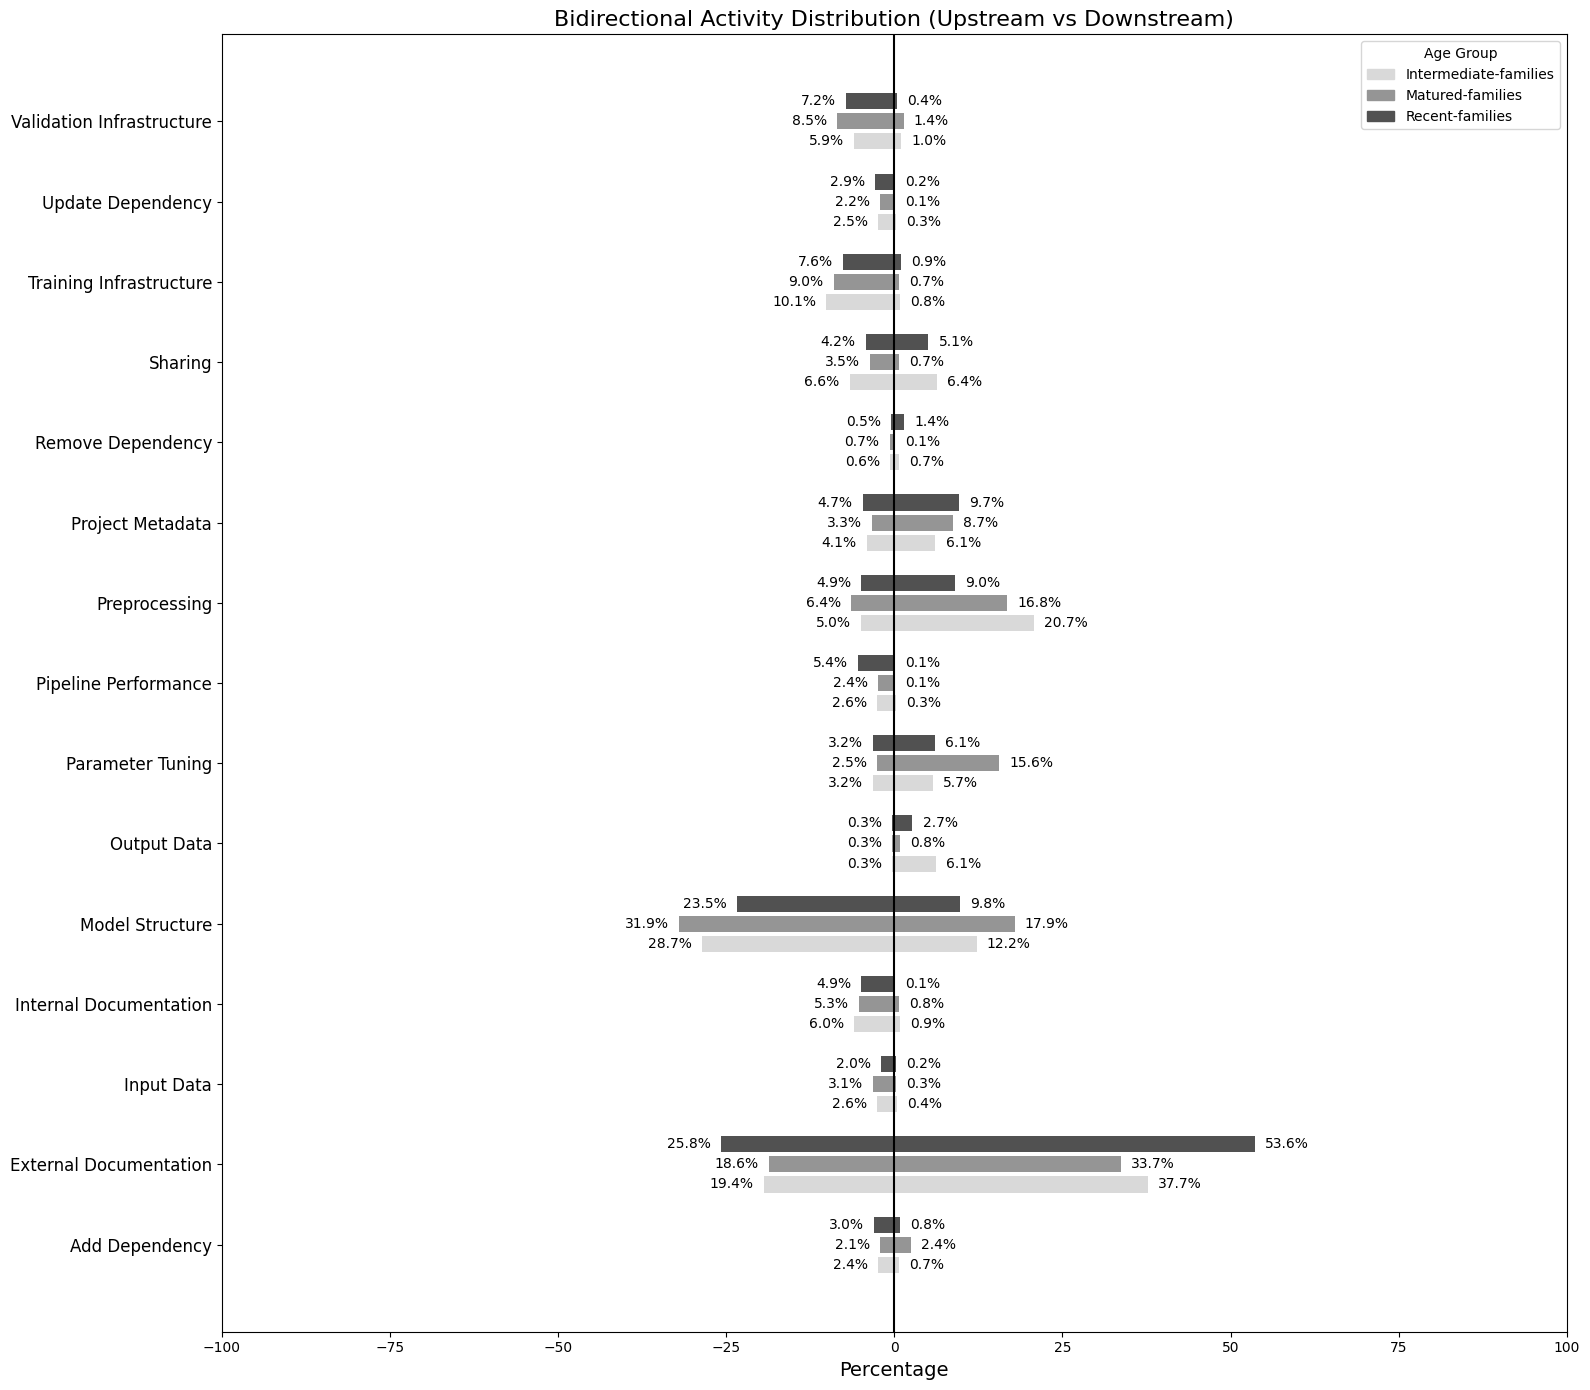

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
file1 = "GH_data_devil.csv"
file2 = "HF_data_devil.csv"

df1 = pd.read_csv(file1, encoding='latin1')
df2 = pd.read_csv(file2, encoding='latin1')

def capitalize_words(text):
    return ' '.join(word.capitalize() for word in str(text).split())

def prepare_data(df, source_label):
    df['label'] = df['label'].apply(capitalize_words)
    df['age_group'] = df['age_group'].apply(capitalize_words)
    df['source'] = source_label
    grouped = df.groupby(['age_group', 'label']).size().reset_index(name='count')
    grouped['percentage'] = grouped.groupby('age_group')['count'].transform(lambda x: x / x.sum() * 100)
    return grouped

# Prepare data
df1_prep = prepare_data(df1, 'Upstream')
df2_prep = prepare_data(df2, 'Downstream')

# Flip upstream percentage
df1_prep['percentage'] *= -1

# Combine
combined = pd.concat([df1_prep, df2_prep], ignore_index=True)

# Unique labels and age groups
labels = sorted(combined['label'].unique())
age_groups = sorted(combined['age_group'].unique())
bar_height = 0.2
group_spacing = 0.05

# Generate y positions
y_positions = {}
base = 0
for label in labels:
    for i, age in enumerate(age_groups):
        y_positions[(label, age)] = base + i * (bar_height + group_spacing)
    base += (len(age_groups) + 1) * (bar_height + group_spacing)

# Plot
fig, ax = plt.subplots(figsize=(16, 14))

# Create color map for dynamic age groups
color_palette = plt.get_cmap('Greys')
colors = {age: color_palette((i + 1) / (len(age_groups) + 1)) for i, age in enumerate(age_groups)}

# Draw bars
for _, row in combined.iterrows():
    label = row['label']
    age_group = row['age_group']
    key = (label, age_group)
    
    # Avoid crash if key doesn't exist in y_positions
    if key not in y_positions:
        continue
    
    y = y_positions[key]
    color = colors[age_group]
    
    ax.barh(y, row['percentage'], height=bar_height, color=color)
    ax.text(
        row['percentage'] + (1.5 if row['percentage'] > 0 else -1.5),
        y,
        f"{abs(row['percentage']):.1f}%",
        va='center',
        ha='left' if row['percentage'] > 0 else 'right',
        fontsize=10
    )

# Label positions
yticks = []
yticklabels = []
for label in labels:
    positions = [y_positions[(label, age)] for age in age_groups if (label, age) in y_positions]
    if positions:
        yticks.append(sum(positions) / len(positions))
        yticklabels.append(label)

ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels, fontsize=12)

ax.axvline(0, color='black')
ax.set_xlim(-100, 100)
ax.set_xlabel('Percentage', fontsize=14)
ax.set_title('Bidirectional Activity Distribution (Upstream vs Downstream)', fontsize=16)

# Legend
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=colors[age]) for age in age_groups]
ax.legend(legend_handles, age_groups, title='Age Group')

plt.tight_layout()
#plt.savefig("final_bidirectional_plot.pdf", bbox_inches='tight')
plt.show()


C:\Users\damaj\AppData\Local\Temp\ipykernel_16036\3696047542.py:8: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(file1, encoding='latin1')


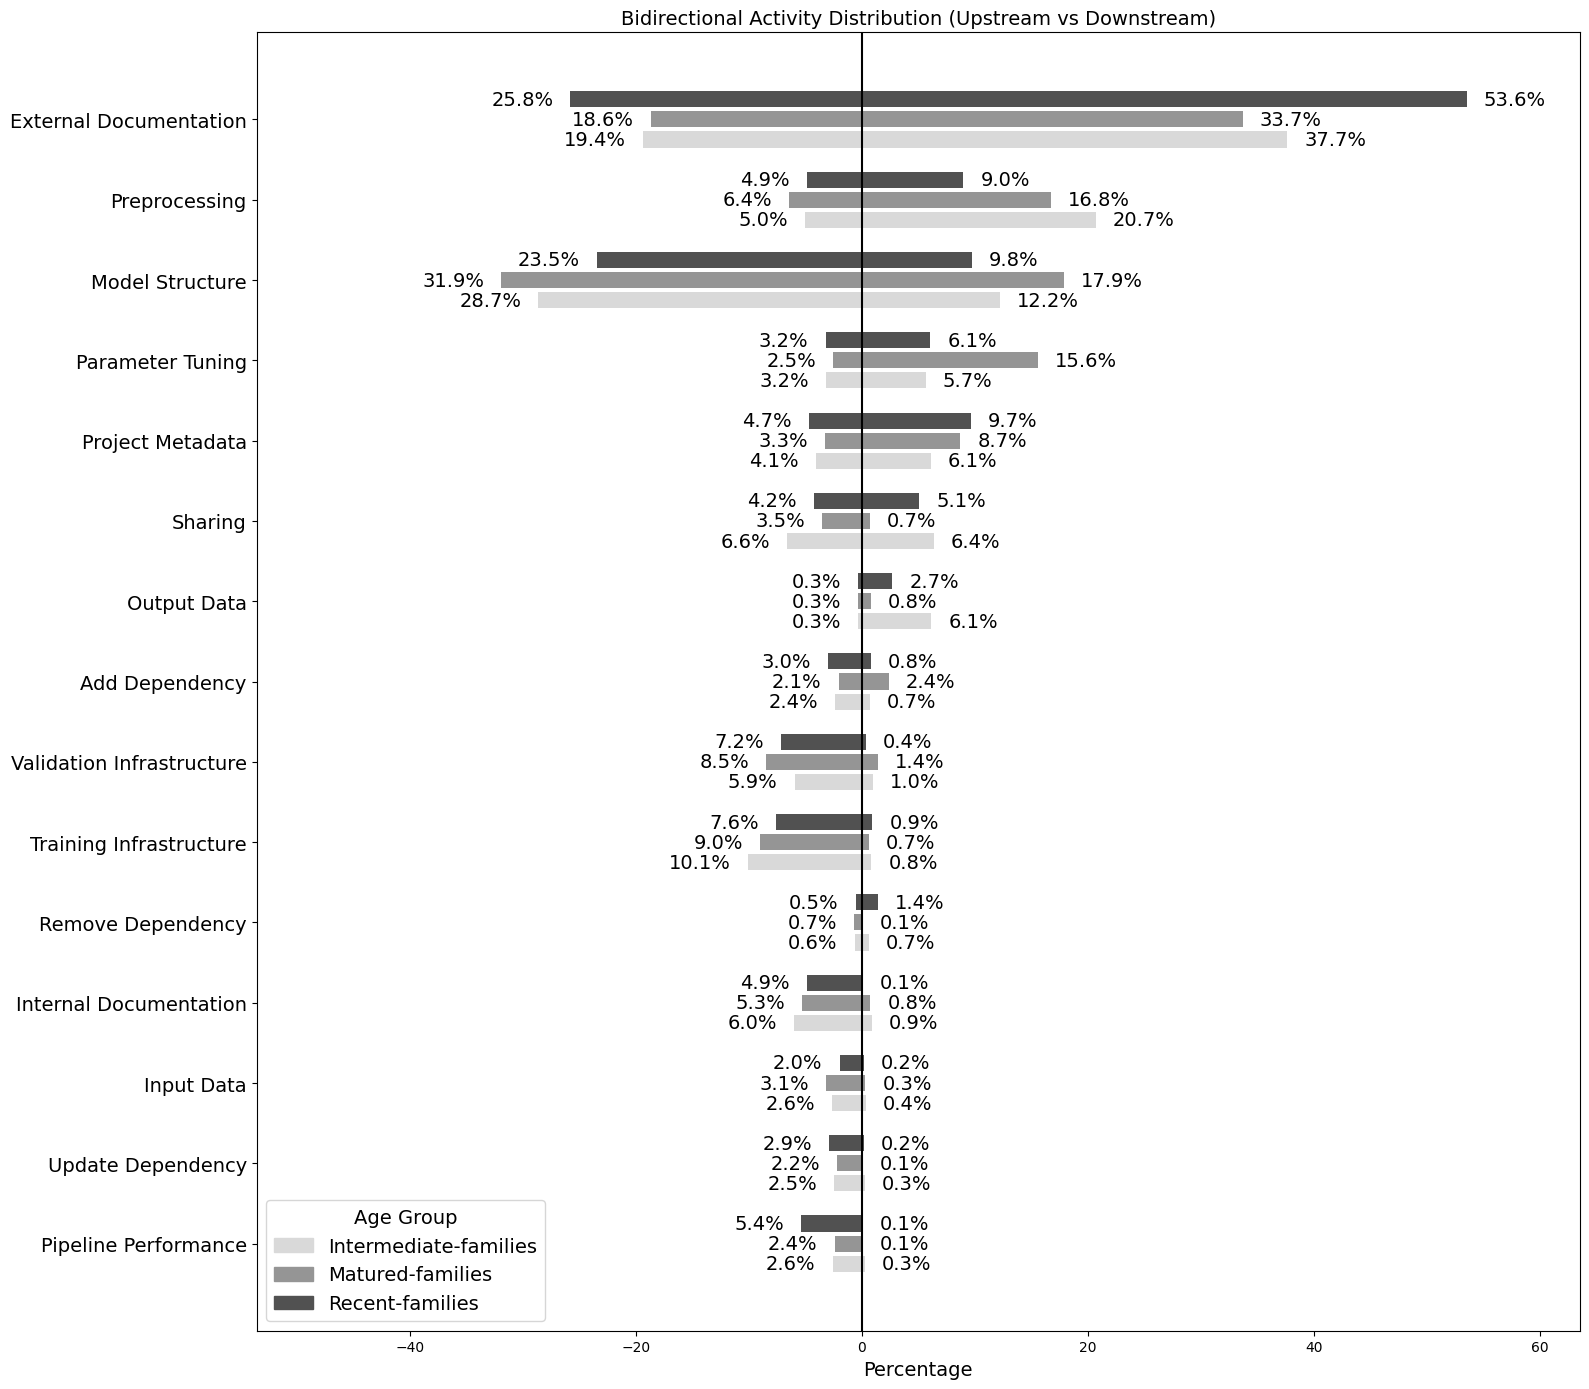

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
file1 = "GH_data_devil.csv"
file2 = "HF_data_devil.csv"

df1 = pd.read_csv(file1, encoding='latin1')
df2 = pd.read_csv(file2, encoding='latin1')

def capitalize_words(text):
    return ' '.join(word.capitalize() for word in str(text).split())

def prepare_data(df, source_label):
    df['label'] = df['label'].apply(capitalize_words)
    df['age_group'] = df['age_group'].apply(capitalize_words)
    df['source'] = source_label
    grouped = df.groupby(['age_group', 'label']).size().reset_index(name='count')
    grouped['percentage'] = grouped.groupby('age_group')['count'].transform(lambda x: x / x.sum() * 100)
    return grouped

# Prepare data
df1_prep = prepare_data(df1, 'Upstream')
df2_prep = prepare_data(df2, 'Downstream')

# Flip upstream percentage
df1_prep['percentage'] *= -1

# Combine
combined = pd.concat([df1_prep, df2_prep], ignore_index=True)
# Define age group order (older = darker)
age_groups = ['Recent-families', 'Intermediate-families', 'Matured-families']
combined['age_group'] = pd.Categorical(combined['age_group'], categories=age_groups, ordered=True)


# Sort labels by Upstream percentage (sum across age groups)
downstream_totals = df2_prep.groupby('label')['percentage'].sum().sort_values(ascending=True).index.tolist()
labels = downstream_totals  # Sorted from highest to lowest downstream

# Unique age groups
age_groups = sorted(combined['age_group'].unique())
bar_height = 0.2
group_spacing = 0.05

# Generate y positions
y_positions = {}
base = 0
for label in labels:
    for i, age in enumerate(age_groups):
        y_positions[(label, age)] = base + i * (bar_height + group_spacing)
    base += (len(age_groups) + 1) * (bar_height + group_spacing)

# Plot
fig, ax = plt.subplots(figsize=(16, 14))

# Color palette for age groups
color_palette = plt.get_cmap('Greys')
colors = {age: color_palette((i + 1) / (len(age_groups) + 1)) for i, age in enumerate(age_groups)}

# Draw bars
max_percent = 0
for _, row in combined.iterrows():
    key = (row['label'], row['age_group'])
    if key not in y_positions:
        continue
    y = y_positions[key]
    color = colors[row['age_group']]
    value = row['percentage']
    ax.barh(y, value, height=bar_height, color=color)
    ax.text(
        value + (1.5 if value > 0 else -1.5),
        y,
        f"{abs(value):.1f}%",
        va='center',
        ha='left' if value > 0 else 'right',
        fontsize=14
    )
    max_percent = max(max_percent, abs(value))

# Label positions
yticks = []
yticklabels = []
for label in labels:
    positions = [y_positions[(label, age)] for age in age_groups if (label, age) in y_positions]
    if positions:
        yticks.append(sum(positions) / len(positions))
        yticklabels.append(label)

ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels, fontsize=14)

ax.axvline(0, color='black')
ax.set_xlim(-max_percent - 0, max_percent + 10)
ax.set_xlabel('Percentage', fontsize=14)
ax.set_title('Bidirectional Activity Distribution (Upstream vs Downstream)', fontsize=14)

# Legend
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=colors[age]) for age in age_groups]
ax.legend(legend_handles, age_groups, title='Age Group', fontsize=14, title_fontsize=14)

plt.tight_layout()
#plt.savefig("final_bidirectional_sorted_plot.pdf", bbox_inches='tight')
plt.show()


C:\Users\damaj\AppData\Local\Temp\ipykernel_16036\2989260552.py:8: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(file1, encoding='latin1')


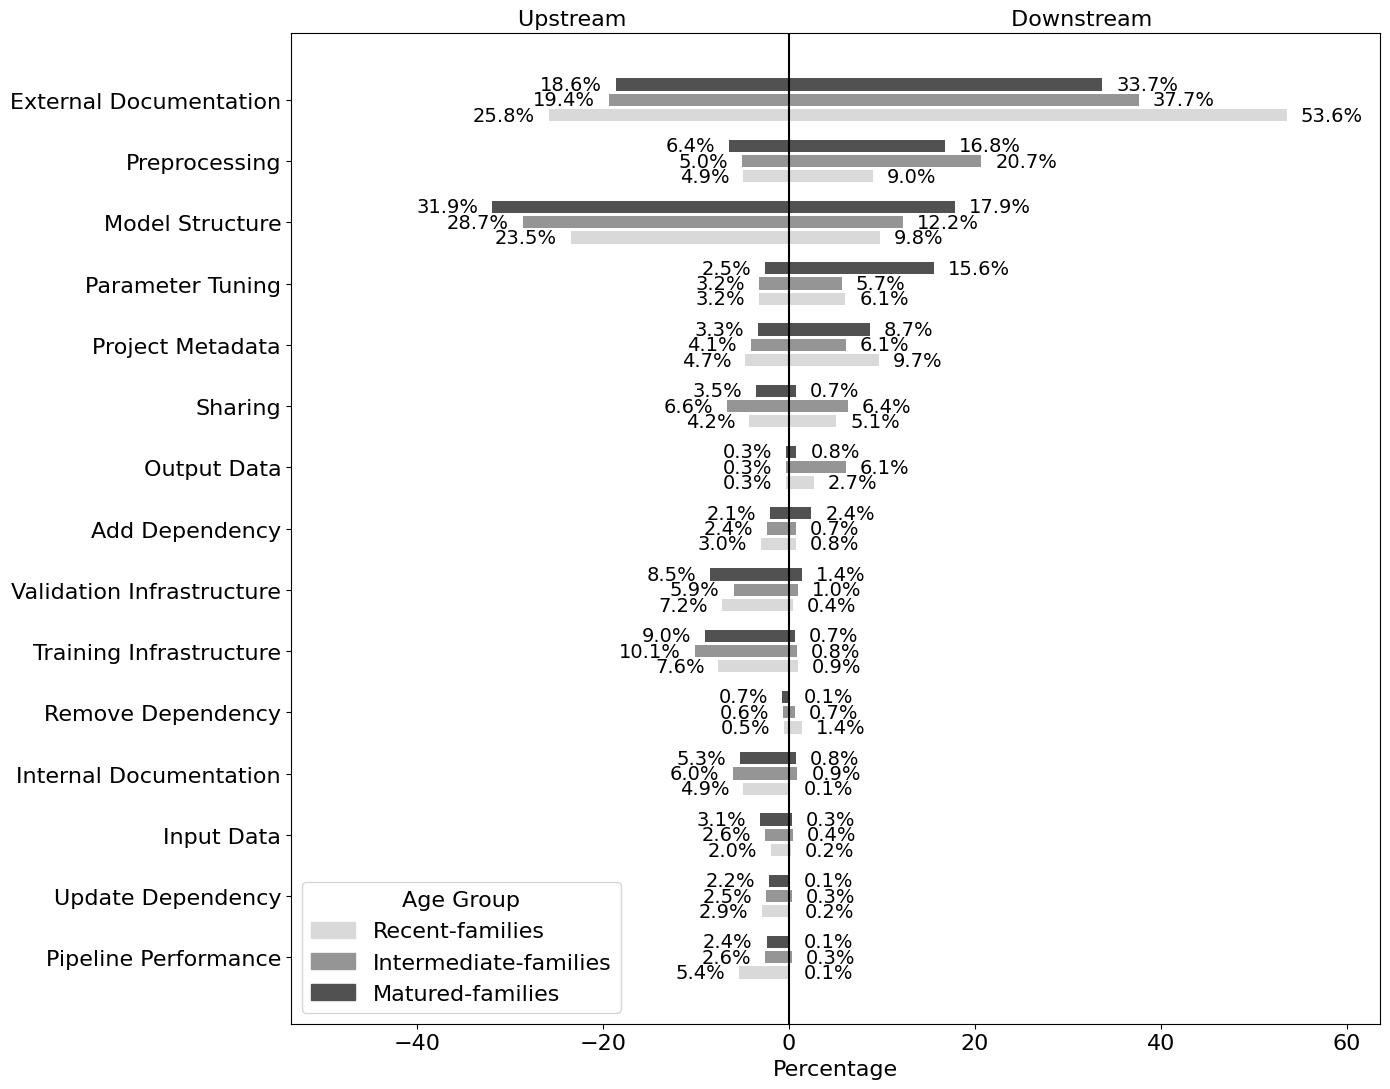

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
file1 = "GH_data_devil.csv"
file2 = "HF_data_devil.csv"

df1 = pd.read_csv(file1, encoding='latin1')
df2 = pd.read_csv(file2, encoding='latin1')

def capitalize_words(text):
    return ' '.join(word.capitalize() for word in str(text).split())

def prepare_data(df, source_label):
    df['label'] = df['label'].apply(capitalize_words)
    df['age_group'] = df['age_group'].apply(capitalize_words)
    df['source'] = source_label
    grouped = df.groupby(['age_group', 'label']).size().reset_index(name='count')
    grouped['percentage'] = grouped.groupby('age_group')['count'].transform(lambda x: x / x.sum() * 100)
    return grouped

# Prepare data
df1_prep = prepare_data(df1, 'Upstream')
df2_prep = prepare_data(df2, 'Downstream')

# Flip upstream percentage
df1_prep['percentage'] *= -1

# Combine
combined = pd.concat([df1_prep, df2_prep], ignore_index=True)

# Define age group order (older = darker)
age_groups = ['Recent-families', 'Intermediate-families', 'Matured-families']
combined['age_group'] = pd.Categorical(combined['age_group'], categories=age_groups, ordered=True)

# Sort labels by Downstream percentage (descending)
downstream_totals = df2_prep.groupby('label')['percentage'].sum().sort_values(ascending=True)
labels = downstream_totals.index.tolist()

# Bar height and spacing
bar_height = 0.2
group_spacing = 0.05

# Generate y positions
y_positions = {}
base = 0
for label in labels:
    for i, age in enumerate(age_groups):
        y_positions[(label, age)] = base + i * (bar_height + group_spacing)
    base += (len(age_groups) + 1) * (bar_height + group_spacing)

# Plot
fig, ax = plt.subplots(figsize=(14, 11))

# Define grayscale color palette (older = darker)
color_palette = plt.get_cmap('Greys')
colors = {age: color_palette((i + 1) / (len(age_groups) + 1)) for i, age in enumerate(age_groups)}



# Draw bars
max_percent = 0
for _, row in combined.iterrows():
    key = (row['label'], row['age_group'])
    if key not in y_positions:
        continue
    y = y_positions[key]
    color = colors[row['age_group']]
    value = row['percentage']
    ax.barh(y, value, height=bar_height, color=color)
    ax.text(
        value + (1.5 if value > 0 else -1.5),
        y,
        f"{abs(value):.1f}%",
        va='center',
        ha='left' if value > 0 else 'right',
        fontsize=14
    )
    max_percent = max(max_percent, abs(value))

# Y-axis labels
yticks = []
yticklabels = []
for label in labels:
    positions = [y_positions[(label, age)] for age in age_groups if (label, age) in y_positions]
    if positions:
        yticks.append(sum(positions) / len(positions))
        yticklabels.append(label)

ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels, fontsize=16)

# Axis and labels
ax.axvline(0, color='black')
ax.set_xlim(-max_percent - 0, max_percent + 10)
ax.set_xlabel('Percentage', fontsize=16)
ax.tick_params(axis='x', labelsize=16)  # Increase x-axis tick font size
ax.set_title('Upstream                                                      Downstream', fontsize=16)

# Legend
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=colors[age]) for age in age_groups]
ax.legend(legend_handles, age_groups, title='Age Group', fontsize=16, title_fontsize=16)

#ax.set_facecolor("white")  # Axis background
#fig.patch.set_facecolor("white")  # Figure background
ax.grid(False)  # Remove grid lines

plt.tight_layout()
plt.savefig("argument_1.pdf", bbox_inches='tight')
plt.show()


In [13]:
file1 = "GH_data_devil.csv"
file2 = "HF_data_devil.csv"

df1 = pd.read_csv(file1, encoding='latin1')
df2 = pd.read_csv(file2, encoding='latin1')

df_gh = df1
df_hf = df2

# Function to create a contingency table for a specific age group
def create_age_specific_contingency(df_gh, df_hf, age_group):
    gh_subset = df_gh[df_gh['age_group'] == age_group]
    hf_subset = df_hf[df_hf['age_group'] == age_group]

    # Create count tables
    gh_counts = gh_subset['label'].value_counts().rename("GitHub").to_frame()
    hf_counts = hf_subset['label'].value_counts().rename("Hugging Face").to_frame()

    # Combine GitHub and Hugging Face counts
    combined = gh_counts.join(hf_counts, how='outer').fillna(0)  # Fill missing labels with 0

    return combined

# List of age groups
age_groups = ['Recent-Families', 'Intermediate-Families', 'Matured-Families']

# Calculate Bonferroni-corrected significance level
alpha = 0.05
num_tests = len(age_groups)
bonferroni_alpha = alpha / num_tests

# Perform chi-square tests for each age group
for age in age_groups:
    print(f"\nChi-square test for {age} models:\n")

    contingency_table = create_age_specific_contingency(df_gh, df_hf, age)

    # Perform the test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Compute sample size (total observations)
    n = contingency_table.to_numpy().sum()

    # Compute Cramér’s V
    #v = cramers_v(chi2, n, dof)

    # Print results
    print(contingency_table)
    print(f"Chi-square value: {chi2:.4f}")
    print(f"P-value: {p:.4f}")
    print(f"Degrees of freedom: {dof}")
    #print(f"Cramér's V (effect size): {v:.4f}")
    print("Expected frequencies under null hypothesis:")
    print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))

    # Interpretation with Bonferroni correction
    if p < bonferroni_alpha:
        print(f"\n➡ Statistically significant difference found between GitHub and Hugging Face for {age} models (Bonferroni-corrected p < {bonferroni_alpha:.4f}).\n")
    else:
        print(f"\n➡ No statistically significant difference found for {age} models (Bonferroni-corrected p ≥ {bonferroni_alpha:.4f}).\n")

print(f"Note: Bonferroni-corrected significance level: {bonferroni_alpha:.4f}")


C:\Users\damaj\AppData\Local\Temp\ipykernel_16036\1100352293.py:4: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(file1, encoding='latin1')



Chi-square test for Recent-Families models:

                           GitHub  Hugging Face
label                                          
add dependency                933            26
external documentation       8120          1786
input data                    622             6
internal documentation       1540             4
model structure              7382           326
output data                    96            90
parameter tuning             1012           202
pipeline performance         1690             4
preprocessing                1539           300
project metadata             1472           323
remove dependency             168            48
sharing                      1337           169
training infrastructure      2386            31
update dependency             914             5
validation infrastructure    2258            13
Chi-square value: 2675.8645
P-value: 0.0000
Degrees of freedom: 14
Expected frequencies under null hypothesis:
                           

In [14]:
from scipy.stats import shapiro, levene, chi2_contingency
import pandas as pd

df_gh = df1
df_hf = df2

# Function to create contingency table (same as before)
def create_age_specific_contingency(df_gh, df_hf, age_group):
    gh_subset = df_gh[df_gh['age_group'] == age_group]
    hf_subset = df_hf[df_hf['age_group'] == age_group]

    # Create count tables
    gh_counts = gh_subset['label'].value_counts().rename("GitHub").to_frame()
    hf_counts = hf_subset['label'].value_counts().rename("Hugging Face").to_frame()

    # Combine GitHub and Hugging Face counts
    combined = gh_counts.join(hf_counts, how='outer').fillna(0)  # Fill missing labels with 0

    return combined

# List of age groups
age_groups = ['Recent-Families', 'Intermediate-Families', 'Matured-Families']

# Normality and Homogeneity of Variance Tests
for age in age_groups:
    print(f"\nTesting normality for {age} models:\n")

    # Get contingency table
    contingency_table = create_age_specific_contingency(df_gh, df_hf, age)

    # Flatten counts for normality and variance tests
    gh_values = contingency_table["GitHub"].values
    hf_values = contingency_table["Hugging Face"].values

    # Shapiro-Wilk test for normality
    stat_gh, p_gh = shapiro(gh_values)
    stat_hf, p_hf = shapiro(hf_values)
    
    print(f"Shapiro-Wilk test (GitHub): p-value = {p_gh:.4f}")
    print(f"Shapiro-Wilk test (Hugging Face): p-value = {p_hf:.4f}")

    # Levene’s test for homogeneity of variance
    stat_var, p_var = levene(gh_values, hf_values)
    print(f"Levene’s test p-value: {p_var:.4f}")

    # Interpretation
    if p_gh < 0.05 or p_hf < 0.05:
        print("➡ Data is NOT normally distributed. Chi-square may not be appropriate.\n")
    else:
        print("✅ Data is normally distributed. Proceeding with Chi-square test.\n")

    if p_var < 0.05:
        print("➡ Variances are NOT equal. Consider using a non-parametric alternative.\n")
    else:
        print("✅ Variances are equal. Proceeding with Chi-square test.\n")

# Bonferroni correction
alpha = 0.05
bonferroni_alpha = alpha / len(age_groups)
print(f"Note: Bonferroni-corrected significance level: {bonferroni_alpha:.4f}")



Testing normality for Recent-Families models:

Shapiro-Wilk test (GitHub): p-value = 0.0002
Shapiro-Wilk test (Hugging Face): p-value = 0.0000
Levene’s test p-value: 0.0500
➡ Data is NOT normally distributed. Chi-square may not be appropriate.

➡ Variances are NOT equal. Consider using a non-parametric alternative.


Testing normality for Intermediate-Families models:

Shapiro-Wilk test (GitHub): p-value = 0.0004
Shapiro-Wilk test (Hugging Face): p-value = 0.0001
Levene’s test p-value: 0.0599
➡ Data is NOT normally distributed. Chi-square may not be appropriate.

✅ Variances are equal. Proceeding with Chi-square test.


Testing normality for Matured-Families models:

Shapiro-Wilk test (GitHub): p-value = 0.0002
Shapiro-Wilk test (Hugging Face): p-value = 0.0003
Levene’s test p-value: 0.0514
➡ Data is NOT normally distributed. Chi-square may not be appropriate.

✅ Variances are equal. Proceeding with Chi-square test.

Note: Bonferroni-corrected significance level: 0.0167


In [15]:
def cramers_v(chi2, n, dof):
    return np.sqrt(chi2 / (n * min(dof, len(age_groups) - 1)))

for age in age_groups:
    contingency_table = create_age_specific_contingency(df_gh, df_hf, age)
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    print((n * min(dof, len(age_groups) - 1)))
    print(min(dof, len(age_groups)-1))

    # Compute Cramér’s V
    n = contingency_table.values.sum()
    print(n)
    print(dof)
    effect_size = cramers_v(chi2, n, dof)

    print(f"\nEffect Size (Cramér’s V) for {age}: {effect_size:.4f}")

127748
2
34802
14

Effect Size (Cramér’s V) for Recent-Families: 0.1961
69604
2
50786
14

Effect Size (Cramér’s V) for Intermediate-Families: 0.2698
101572
2
63874
14

Effect Size (Cramér’s V) for Matured-Families: 0.2164


C:\Users\damaj\AppData\Local\Temp\ipykernel_16036\3883306279.py:8: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_gh = pd.read_csv(file1, encoding='latin1')
C:\Users\damaj\AppData\Local\Temp\ipykernel_16036\3883306279.py:49: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = comb_data.groupby(["age_group", "similarity_score_group"])["family"].count().reset_index()


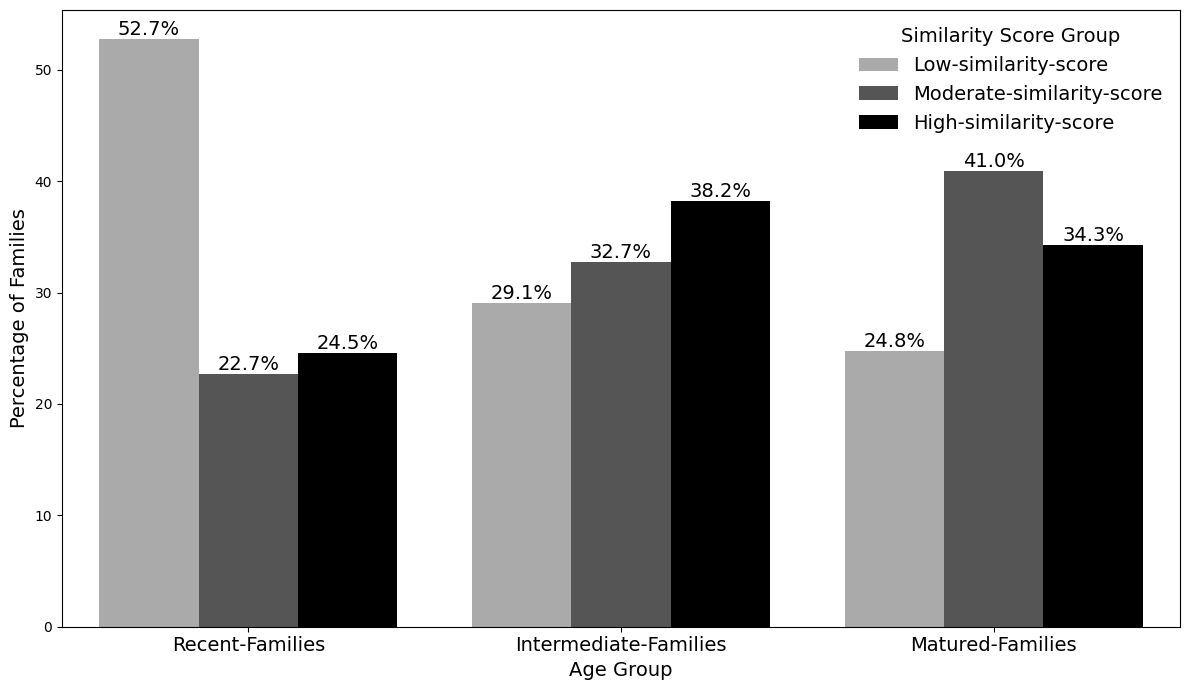

In [16]:
# Load the datasets
file1 = "GH_data_devil.csv"
file2 = "HF_data_devil.csv"
f1 = "families_per_bin_used.csv"
f2 = "family_similarity_scores.csv"
f3 = "family_author_comparison.json"

df_gh = pd.read_csv(file1, encoding='latin1')
df_hf = pd.read_csv(file2, encoding='latin1')
family_bin = pd.read_csv(f1, encoding='latin1')
sim_score = pd.read_csv(f2, encoding='latin1')
common_author = pd.read_json(f3, encoding='latin1')

sim_score = sim_score.rename(columns={'Family': 'family'})

sim_score['similarity_score_group'] = pd.qcut(sim_score['Similarity Score'], q=3, labels=["Low-similarity-score", "Moderate-similarity-score", "High-similarity-score"])

recent = sim_score[sim_score['similarity_score_group'] == "Recent-Families"]
intermediate = sim_score[sim_score['similarity_score_group'] == "Intermediate-Families"]
matured = sim_score[sim_score['similarity_score_group'] == "Matured-Families"]

recent_ages = f"the minimum is {recent['Similarity Score'].min()} and the maximum is {recent['Similarity Score'].max()}"
inter_ages = f"the minimum is {intermediate['Similarity Score'].min()} and the maximum is {intermediate['Similarity Score'].max()}"
matured_ages = f"the minimum is {matured['Similarity Score'].min()} and the maximum is {matured['Similarity Score'].max()}"

group_family = df_hf.groupby(["family", "age_group"]).agg({
    'author': 'nunique'
}).reset_index()

gh = df_gh.groupby(["family", "age_group"]).agg({
    'author_username': 'unique'
}).reset_index()

hf = df_hf.groupby(["family", "age_group"]).agg({
    'author': 'unique'
}).reset_index()


HF = pd.merge(df_hf, sim_score, on='family', how='inner')
GH = pd.merge(df_gh, sim_score, on='family', how='inner')

families = group_family[["family", "age_group"]]

comb_data = pd.merge(sim_score, families, on='family', how='inner')

age_order = ["Recent-Families", "Intermediate-Families", "Matured-Families"]

# Count families in each category
df_grouped = comb_data.groupby(["age_group", "similarity_score_group"])["family"].count().reset_index()

# Calculate percentages within each age group
df_grouped["percentage"] = df_grouped.groupby("age_group")["family"].transform(lambda x: (x / x.sum()) * 100)

# Sort the x-axis correctly
df_grouped["age_group"] = pd.Categorical(df_grouped["age_group"], categories=age_order, ordered=True)

# Plot
"""plt.figure(figsize=(12, 7))
ax = sns.barplot(data=df_grouped, x="age_group", y="percentage", hue="similarity_score_group", color='gray')

# Add percentage labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="edge", fontsize=14)

# Set labels and title with font size 14
plt.xlabel("Age Group", fontsize=14)
plt.ylabel("Percentage of Families", fontsize=14)
#plt.title("Distribution of Families Across Similarity Score Groups and Age Groups", fontsize=14)

# Set legend title and labels with font size 14
plt.legend(title="Similarity Score Group", title_fontsize=14, fontsize=14, frameon=False)

# Set x-axis tick labels with font size 14
plt.xticks(rotation=0, fontsize=14)

# Adjust layout for better spacing
plt.tight_layout()

# Save the plot
plt.savefig("argument2_1.pdf", bbox_inches='tight')
plt.show()"""

plt.figure(figsize=(12, 7))
palette = {
    "High-similarity-score": "black",
    "Moderate-similarity-score": "#555555",  # deep gray
    "Low-similarity-score": "#aaaaaa"       # light gray
}

ax = sns.barplot(
    data=df_grouped, 
    x="age_group", 
    y="percentage", 
    hue="similarity_score_group", 
    palette=palette
)

# Add percentage labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="edge", fontsize=14)

# Set labels and title with font size 14
plt.xlabel("Age Group", fontsize=14)
plt.ylabel("Percentage of Families", fontsize=14)

# Set legend title and labels with font size 14
plt.legend(title="Similarity Score Group", title_fontsize=14, fontsize=14, frameon=False)

# Set x-axis tick labels with font size 14
plt.xticks(rotation=0, fontsize=14)

# Adjust layout for better spacing
plt.tight_layout()

# Save the plot
plt.savefig("argument2_1.pdf", bbox_inches='tight')
plt.show()

In [17]:
sim_score['similarity_score_group']

low = sim_score[sim_score["similarity_score_group"] == "Low-similarity-score"]
mod = sim_score[sim_score["similarity_score_group"] == "Moderate-similarity-score"]
hig = sim_score[sim_score["similarity_score_group"] == "High-similarity-score"]

low_ = f"The minimum is {low['Similarity Score'].min()} and the maximum is {low['Similarity Score'].max()}"
mod_ = f"The minimum is {mod['Similarity Score'].min()} and the maximum is {mod['Similarity Score'].max()}"
hig_ = f"The minimum is {hig['Similarity Score'].min()} and the maximum is {hig['Similarity Score'].max()}"


print(low_)
print(mod_)
print(hig_)
print()

print(len(low))
print(len(mod))
print(len(hig))

The minimum is 0.0 and the maximum is 0.3333333333333333
The minimum is 0.3571428571428571 and the maximum is 0.4666666666666667
The minimum is 0.5 and the maximum is 1.0

116
104
105


In [18]:
import pandas as pd
from scipy.stats import chi2_contingency
import ast

# Load the datasets
file1 = "GH_labelled_with_patterns.csv"
file2 = "HF_labelled_with_patterns_authors.csv"
f2 = "must_exclude_from_all_analysis.csv"

df_gh = pd.read_csv(file1, encoding='latin1')
df_hf = pd.read_csv(file2, encoding='latin1')
dfs2 = pd.read_csv(f2, encoding='latin1')

HF1 = df_hf[df_hf['author_HF'] != "No_GH"]

exclusion = list(dfs2['family'].unique())

GH = df_gh[~df_gh['family'].isin(exclusion)]
HF = HF1[~HF1['family'].isin(exclusion)]

gh = GH.groupby("family").agg({
    'author_GH': 'unique'
}).reset_index()

hf = HF.groupby("family").agg({
    'author_HF': 'unique'
}).reset_index()

def string_to_list(x):
    if isinstance(x, str):
        try:
            return ast.literal_eval(x)
        except (SyntaxError, ValueError):
            return []
    return x

# Apply the function to ensure that the author columns contains list
gh['author_GH'] = gh['author_GH'].apply(string_to_list)
hf['author_HF'] = hf['author_HF'].apply(string_to_list)

merged = pd.merge(hf, gh,  on="family", how="inner")

# Extract three families, their authors, and common authors
sample_families = merged  # Select the first three families
family_data = []

for _, row in sample_families.iterrows():
    family_name = row['family']
    authors_gh = set(row['author_GH'])  # Convert to set for comparison
    authors_hf = set(row['author_HF'])
    common_authors = list(authors_hf.intersection(authors_gh))  # Find common authors

    family_data.append({
        "family": family_name,
        "authors_GH": list(authors_gh),
        "authors_HF": list(authors_hf),
        "common_authors": common_authors
    })

# Convert to a DataFrame for easy display
result_df = pd.DataFrame(family_data)
result_df['common_authors_count'] = result_df['common_authors'].apply(len)
#result_df['total'] = lambda x: x in result_df['common_authors']

# Print results
print("\nSample Families with Authors from GH and HF and Their Common Authors:")
print(result_df)

# Optionally, save results to CSV
result_df.to_json("family_author_comparison.json", index=False)





Sample Families with Authors from GH and HF and Their Common Authors:
                          family  \
0                       01-ai_YI   
1     1-800-BAD-CODE_XLM-ROBERTA   
2                42dot_42DOT-LLM   
3    AnnaWegmann_Style-Embedding   
4                       BAAI_bge   
..                           ...   
301             wukevin_tcr-bert   
302                wxjiao_alpaca   
303                  xlnet_xlnet   
304                  yahma_llama   
305          yangheng_absa-model   

                                            authors_GH  \
0    [https://github.com/MileyFu, https://github.co...   
1    [https://github.com/1-800-BAD-CODE, https://gi...   
2    [https://github.com/blueworm7, https://github....   
3    [https://github.com/Unknown, https://github.co...   
4    [https://github.com/zh217, https://github.com/...   
..                                                 ...   
301  [https://github.com/swansonk14, https://github...   
302                        [http

In [19]:
comb_sim = pd.merge_ordered(sim_score, common_author, on="family", how="outer")
argument_2_part1 = pd.merge(comb_sim, families, on="family", how="outer")
df = argument_2_part1[["family", "Similarity Score", "similarity_score_group", "common_authors_count", "age_group"]]

df['common_authors_count'] = df['common_authors_count'].replace(0, 1)

def group_authors(count):
    return "Single-author" if count == 1 else "Multiple-authors"

df['common_author_group'] = df['common_authors_count'].apply(group_authors)
df

C:\Users\damaj\AppData\Local\Temp\ipykernel_16036\22920472.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['common_authors_count'] = df['common_authors_count'].replace(0, 1)
C:\Users\damaj\AppData\Local\Temp\ipykernel_16036\22920472.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['common_author_group'] = df['common_authors_count'].apply(group_authors)


,family,Similarity Score,similarity_score_group,common_authors_count,age_group,common_author_group
0,01-ai_YI,0.714286,High-similarity-score,4.0,Intermediate-Families,Multiple-authors
1,1-800-BAD-CODE_XLM-ROBERTA,0.300000,Low-similarity-score,1.0,Recent-Families,Single-author
2,42dot_42DOT-LLM,0.285714,Low-similarity-score,1.0,Intermediate-Families,Single-author
3,AnnaWegmann_Style-Embedding,0.200000,Low-similarity-score,1.0,Matured-Families,Single-author
4,BAAI_bge,0.600000,High-similarity-score,2.0,Intermediate-Families,Multiple-authors
...,...,...,...,...,...,...
320,wukevin_tcr-bert,0.363636,Moderate-similarity-score,1.0,Recent-Families,Single-author
321,wxjiao_alpaca,0.428571,Moderate-similarity-score,1.0,Recent-Families,Single-author
322,xlnet_xlnet,0.714286,High-similarity-score,1.0,Matured-Families,Single-author
323,yahma_llama,0.222222,Low-similarity-score,1.0,Recent-Families,Single-author


In [20]:
large_group = df[df['common_author_group'] == "Single-author"]
small_group = df[df['common_author_group'] == "Multiple-authors"]

print(len(large_group))
print(len(small_group))

256
69


C:\Users\damaj\AppData\Local\Temp\ipykernel_16036\2915140796.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['similarity_score_group', 'common_author_group']).size().unstack(fill_value=0)


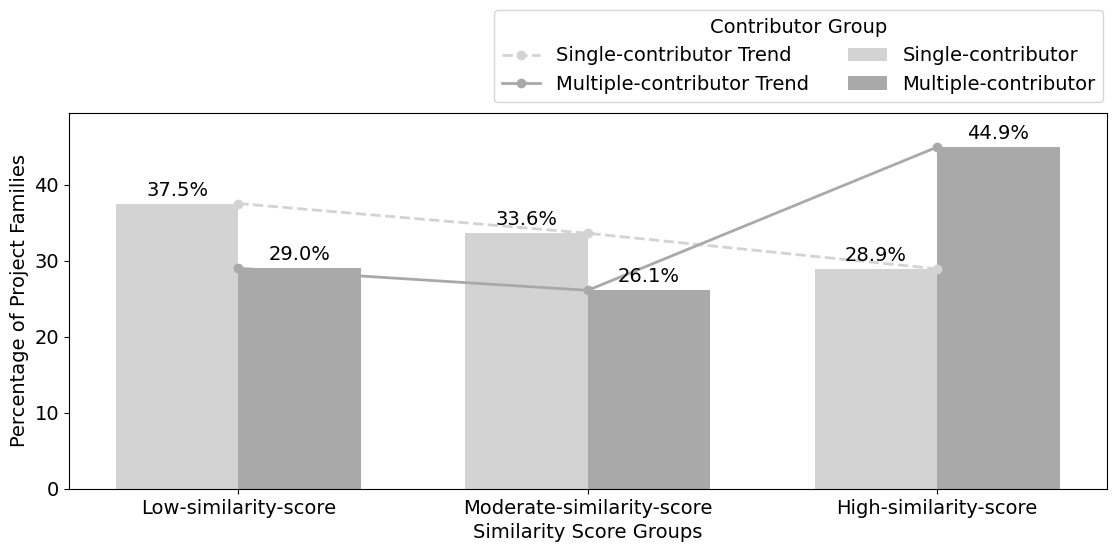

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Group and count
grouped = df.groupby(['similarity_score_group', 'common_author_group']).size().unstack(fill_value=0)

# Order for x-axis
similarity_order = ["Low-similarity-score", "Moderate-similarity-score", "High-similarity-score"]
grouped = grouped.reindex(similarity_order)

# Calculate total count for each author group across all similarity levels
total_single_contributor = grouped['Single-author'].sum()
total_multiple_authors = grouped['Multiple-authors'].sum()

# Calculate percentages across all similarity levels
percentages = grouped.copy()
percentages['Single-author'] = (grouped['Single-author'] / total_single_contributor) * 100
percentages['Multiple-authors'] = (grouped['Multiple-authors'] / total_multiple_authors) * 100

# Plot setup
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(similarity_order))  # positions for the similarity score groups
width = 0.35  # bar width

# Plot bars: one set per contributor group
rects1 = ax.bar(x - width/2, percentages['Single-author'], width, label='Single-contributor', color='lightgray')
rects2 = ax.bar(x + width/2, percentages['Multiple-authors'], width, label='Multiple-contributor', color='darkgray')

# Plot trend lines
ax.plot(x, percentages['Single-author'], label='Single-contributor Trend', color='lightgray', marker='o', linestyle='--', linewidth=2)
ax.plot(x, percentages['Multiple-authors'], label='Multiple-contributor Trend', color='darkgray', marker='o', linestyle='-', linewidth=2)

# Axes and labels
ax.set_xlabel('Similarity Score Groups', fontsize=14)
ax.set_ylabel('Percentage of Project Families', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(similarity_order, fontsize=14)

# Adjust y-axis limit to avoid cutting off the labels
max_percentage = max(percentages['Single-author'].max(), percentages['Multiple-authors'].max())
ax.set_ylim(0, max_percentage * 1.1)  # Set a limit higher than the max percentage

# Adjust legend to be outside the plot area, positioned at the top
ax.legend(title='Contributor Group', fontsize=14, bbox_to_anchor=(0.4, 1.3), loc='upper left', ncol=2)

# Add data labels on bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=14)

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.savefig("argument2_2.pdf", bbox_inches='tight')
plt.show()


In [22]:
from scipy.stats import chi2_contingency

# Perform the Chi-squared test on the grouped data
chi2_stat, p_val, dof, expected = chi2_contingency(grouped)

# Print the result
print(f"Chi-squared statistic: {chi2_stat}")
print(f"P-value: {p_val}")
print(f"Degrees of freedom: {dof}")
print(f"Expected frequencies:\n{expected}")

Chi-squared statistic: 6.379182293154019
P-value: 0.04118870764106919
Degrees of freedom: 2
Expected frequencies:
[[24.62769231 91.37230769]
 [22.08       81.92      ]
 [22.29230769 82.70769231]]


In [23]:
chi2_stat, p_val, dof, expected = chi2_contingency(grouped)

def cramers_v(chi2_stat, n, min_dim):
    """Calculate Cramer's V effect size"""
    return np.sqrt(chi2_stat / (n * (min_dim - 1)))

n = grouped.sum().sum()  # Total sample size
min_dim = min(grouped.shape)  # Minimum of (rows, columns)
v = cramers_v(chi2_stat, n, min_dim)

# --- Effect Size Interpretation (Akoglu, 2018) ---
def interpret_cramers_v(v):
    if v == 0:
        return "No relationship"
    elif v <= 0.05:
        return "Very weak relationship"
    elif v <= 0.10:
        return "Weak relationship"
    elif v <= 0.15:
        return "Moderate relationship"
    elif v <= 0.25:
        return "Strong relationship"
    else:
        return "Very strong relationship"

interpretation = interpret_cramers_v(v)

# --- Print Results ---
print("Statistical Test Results:")
print(f"Chi-squared (χ²) = {chi2_stat:.3f}, p = {p_val:.4f}")
print(f"Cramér's V = {v:.3f}")
print(f"Interpretation: {interpretation}")

Statistical Test Results:
Chi-squared (χ²) = 6.379, p = 0.0412
Cramér's V = 0.140
Interpretation: Moderate relationship


C:\Users\damaj\AppData\Local\Temp\ipykernel_16036\2910339823.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['similarity_score_group', 'common_author_group']).size().unstack(fill_value=0)


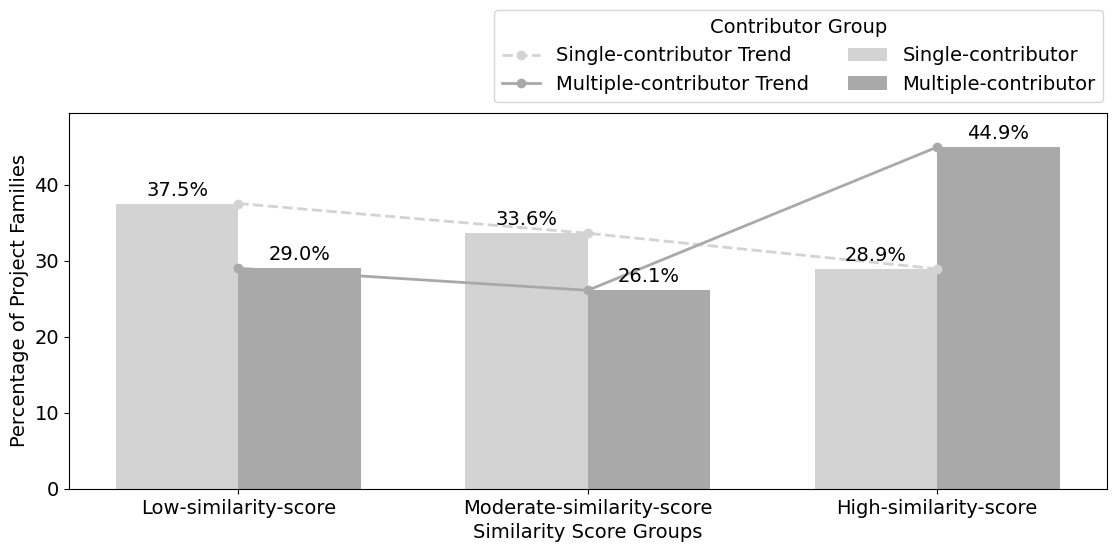

Chi-squared statistic: 6.379182293154019
P-value: 0.04118870764106919
Degrees of freedom: 2
Expected frequencies:
[[24.62769231 91.37230769]
 [22.08       81.92      ]
 [22.29230769 82.70769231]]


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Group and count
grouped = df.groupby(['similarity_score_group', 'common_author_group']).size().unstack(fill_value=0)

# Order for x-axis
similarity_order = ["Low-similarity-score", "Moderate-similarity-score", "High-similarity-score"]
grouped = grouped.reindex(similarity_order)

# Calculate total count for each author group across all similarity levels
total_single_contributor = grouped['Single-author'].sum()
total_multiple_authors = grouped['Multiple-authors'].sum()

# Calculate percentages across all similarity levels
percentages = grouped.copy()
percentages['Single-author'] = (grouped['Single-author'] / total_single_contributor) * 100
percentages['Multiple-authors'] = (grouped['Multiple-authors'] / total_multiple_authors) * 100

# Plot setup
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(similarity_order))  # positions for the similarity score groups
width = 0.35  # bar width

# Plot bars: one set per contributor group
rects1 = ax.bar(x - width/2, percentages['Single-author'], width, label='Single-contributor', color='lightgray')
rects2 = ax.bar(x + width/2, percentages['Multiple-authors'], width, label='Multiple-contributor', color='darkgray')

# Plot trend lines
ax.plot(x, percentages['Single-author'], label='Single-contributor Trend', color='lightgray', marker='o', linestyle='--', linewidth=2)
ax.plot(x, percentages['Multiple-authors'], label='Multiple-contributor Trend', color='darkgray', marker='o', linestyle='-', linewidth=2)

# Axes and labels
ax.set_xlabel('Similarity Score Groups', fontsize=14)
ax.set_ylabel('Percentage of Project Families', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(similarity_order, fontsize=14)

# Adjust y-axis limit to avoid cutting off the labels
max_percentage = max(percentages['Single-author'].max(), percentages['Multiple-authors'].max())
ax.set_ylim(0, max_percentage * 1.1)  # Set a limit higher than the max percentage

# Adjust legend to be outside the plot area, positioned at the top
ax.legend(title='Contributor Group', fontsize=14, bbox_to_anchor=(0.4, 1.3), loc='upper left', ncol=2)

# Add data labels on bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=14)

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.savefig("argument2_2.pdf", bbox_inches='tight')
plt.show()



from scipy.stats import chi2_contingency

# Perform the Chi-squared test on the grouped data
chi2_stat, p_val, dof, expected = chi2_contingency(grouped)

# Print the result
print(f"Chi-squared statistic: {chi2_stat}")
print(f"P-value: {p_val}")
print(f"Degrees of freedom: {dof}")
print(f"Expected frequencies:\n{expected}")